In [17]:
import sorting as srt
import pandas as pd
import numpy as np

data = {}
N = 1000
data['low'] = []
data['high'] = []
data['range'] = []
data['size'] = []
data['merge_time'] = []
data['count_time'] = []
data['comb_time'] = []
data['shell_time'] = []
data['heap_time'] = []
#data['binary_insertion_time'] = []

for _ in range(N):
    array_range = np.random.randint(0, 10000, 2)

    low = min(array_range)
    data['low'].append(low)
    
    high = max(array_range)
    data['high'].append(high)
    
    data['range'].append(high - low)
    
    n = np.random.randint(10, 5000)
    data['size'].append(n)
    
    a1 = np.random.randint(low=low, high=high, size=n)
    a2 = a1.copy()
    a3 = a1.copy()
    a4 = a1.copy()
    a5 = a1.copy()
    #a6 = a1.copy()
    merge_time = srt.performance(algorithm=srt.merge_sort, data=a1)
    count_time = srt.performance(algorithm=srt.count_sort, data=a2)
    comb_time = srt.performance(algorithm=srt.comb_sort, data=a3)
    shell_time = srt.performance(algorithm=srt.shell_sort, data=a4)
    heap_time = srt.performance(algorithm=srt.heap_sort, data=a5)
    #binary_insertion_time = srt.performance(algorithm=srt.insertion_sort, data=a6)
    
    data['merge_time'].append(merge_time)
    data['count_time'].append(count_time)
    data['comb_time'].append(comb_time)
    data['shell_time'].append(shell_time)
    data['heap_time'].append(heap_time)
    #data['binary_insertion_time'].append(shell_time)


In [18]:
df = pd.DataFrame.from_dict(data)
df.to_csv('sorting_data.csv')

### Data Description

The data has as input (l, k, n) where:
    -  l is the lower bound of the list
    -  k is the range of the list
    -  n is the length of the list
    
The data has as output (count, merge) where:
    -  count is a length of time (ms)
    -  merge is a length of time (ms)

In [19]:
# Plot:
#     x-axis: n
#     y-axis: time (ms)

result = df.sort_values(['size', 'range'], ascending=[1, 1])
result

,low,high,range,size,merge_time,count_time,comb_time,shell_time,heap_time
951,196,2036,1840,11,0.043154,0.310898,0.029802,0.019789,0.038147
893,5538,7399,1861,13,0.084162,1.632929,0.034094,0.022173,0.055075
946,6582,8133,1551,20,0.079870,1.173973,0.055075,0.035763,0.084877
261,2730,4523,1793,20,0.084877,0.712872,0.058174,0.039101,0.090122
987,6751,7385,634,30,0.129223,1.093864,0.085831,0.060797,0.136852
926,42,3022,2980,30,0.132084,0.458956,0.091076,0.064850,0.142813
907,5602,9264,3662,32,0.134945,1.672029,0.190020,0.127077,0.304937
162,3261,8439,5178,32,0.139952,1.211882,0.092745,0.074148,0.147820
366,6282,9235,2953,33,0.138044,1.329184,0.105858,0.062943,0.159025
314,695,4917,4222,34,0.140905,0.691891,0.104904,0.068188,0.164270


Merge Average: 24.06 ms
Count Average: 2.69 ms


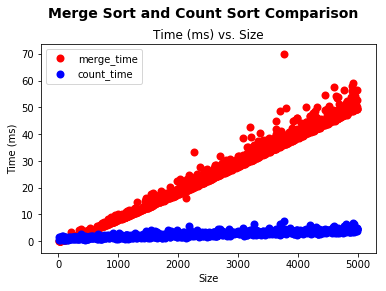

In [21]:
import matplotlib.pyplot as plt

% matplotlib inline

fig = plt.figure()
fig.suptitle('Merge Sort and Count Sort Comparison', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)

ax.set_title('Time (ms) vs. Size')

ax.set_xlabel('Size')
ax.set_ylabel('Time (ms)')

merge_avg = result['merge_time'].mean()
count_avg = result['count_time'].mean()

merge_text = "Merge Average: {0:.2f} ms\n".format(merge_avg)
count_text = "Count Average: {0:.2f} ms".format(count_avg)

print(merge_text + count_text)

# Multiple line plot
plt.scatter('size', 'merge_time', data=result, marker='o', color='red', linewidth=2)
plt.scatter('size', 'count_time', data=result, marker='o', color='blue', linewidth=2)
plt.legend()
plt.show()

Comb Average: 24.94 ms
Shell Average: 17.25 ms


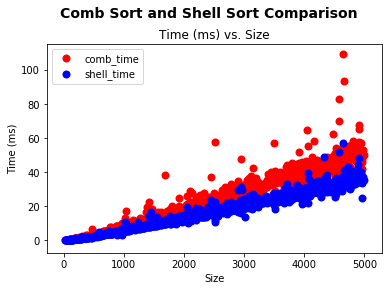

In [7]:
% matplotlib inline

fig = plt.figure()
fig.suptitle('Comb Sort and Shell Sort Comparison', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)

ax.set_title('Time (ms) vs. Size')

ax.set_xlabel('Size')
ax.set_ylabel('Time (ms)')

comb_avg = result['comb_time'].mean()
shell_avg = result['shell_time'].mean()

comb_text = "Comb Average: {0:.2f} ms\n".format(comb_avg)
shell_text = "Shell Average: {0:.2f} ms".format(shell_avg)

print(comb_text + shell_text)

# Multiple line plot
plt.scatter('size', 'comb_time', data=result, marker='o', color='red', linewidth=2)
plt.scatter('size', 'shell_time', data=result, marker='o', color='blue', linewidth=2)
plt.legend()
plt.show()

Heap Average: 31.66 ms



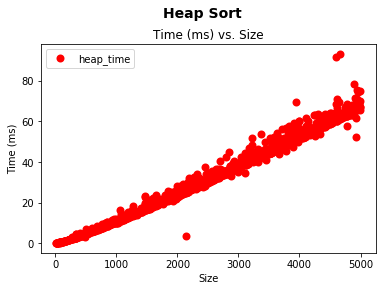

In [22]:
% matplotlib inline

fig = plt.figure()
fig.suptitle('Heap Sort', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)

ax.set_title('Time (ms) vs. Size')
ax.set_xlabel('Size')
ax.set_ylabel('Time (ms)')

heap_avg = result['heap_time'].mean()
#heap_avg = result['binary_insertion_time'].mean()

heap_text = "Heap Average: {0:.2f} ms\n".format(heap_avg)

print(heap_text)

# Multiple line plot
plt.scatter('size', 'heap_time', data=result, marker='o', color='red', linewidth=2)
plt.legend()
plt.show()

[[5], [6], [7, 8, 9, 3, 4]]
[[5], [6, 7], [8, 9, 3, 4]]
[[5], [6, 7, 8], [9, 3, 4]]
[[5], [6, 7, 8, 9], [3, 4]]
[[5], [6, 7, 8, 9, 3], [4]]
[[5, 6], [7], [8, 9, 3, 4]]
[[5, 6], [7, 8], [9, 3, 4]]
[[5, 6], [7, 8, 9], [3, 4]]
[[5, 6], [7, 8, 9, 3], [4]]
[[5, 6, 7], [8], [9, 3, 4]]
[[5, 6, 7], [8, 9], [3, 4]]
[[5, 6, 7], [8, 9, 3], [4]]
[[5, 6, 7, 8], [9], [3, 4]]
[[5, 6, 7, 8], [9, 3], [4]]
[[5, 6, 7, 8, 9], [3], [4]]


In [38]:
def partition(ns, m):
    def visit(n, a):
        ps = [[] for i in range(m)]
        for j in range(n):
            ps[a[j + 1]].append(ns[j])
        return ps

    def f(mu, nu, sigma, n, a):
        if mu == 2:
            yield visit(n, a)
        else:
            for v in f(mu - 1, nu - 1, (mu + sigma) % 2, n, a):
                yield v
        if nu == mu + 1:
            a[mu] = mu - 1
            yield visit(n, a)
            while a[nu] > 0:
                a[nu] = a[nu] - 1
                yield visit(n, a)
        elif nu > mu + 1:
            if (mu + sigma) % 2 == 1:
                a[nu - 1] = mu - 1
            else:
                a[mu] = mu - 1
            if (a[nu] + sigma) % 2 == 1:
                for v in b(mu, nu - 1, 0, n, a):
                    yield v
            else:
                for v in f(mu, nu - 1, 0, n, a):
                    yield v
            while a[nu] > 0:
                a[nu] = a[nu] - 1
                if (a[nu] + sigma) % 2 == 1:
                    for v in b(mu, nu - 1, 0, n, a):
                        yield v
                else:
                    for v in f(mu, nu - 1, 0, n, a):
                        yield v

    def b(mu, nu, sigma, n, a):
        if nu == mu + 1:
            while a[nu] < mu - 1:
                yield visit(n, a)
                a[nu] = a[nu] + 1
            yield visit(n, a)
            a[mu] = 0
        elif nu > mu + 1:
            if (a[nu] + sigma) % 2 == 1:
                for v in f(mu, nu - 1, 0, n, a):
                    yield v
            else:
                for v in b(mu, nu - 1, 0, n, a):
                    yield v
            while a[nu] < mu - 1:
                a[nu] = a[nu] + 1
                if (a[nu] + sigma) % 2 == 1:
                    for v in f(mu, nu - 1, 0, n, a):
                        yield v
                else:
                    for v in b(mu, nu - 1, 0, n, a):
                        yield v
            if (mu + sigma) % 2 == 1:
                a[nu - 1] = 0
            else:
                a[mu] = 0
        if mu == 2:
            yield visit(n, a)
        else:
            for v in b(mu - 1, nu - 1, (mu + sigma) % 2, n, a):
                yield v

    n = len(ns)
    a = [0] * (n + 1)
    for j in range(1, m + 1):
        a[n - m + j] = j - 1
    return f(m, n, 0, n, a)
    

In [66]:
import time

start = time.time()
items = [i for i in range(1000)]
p = partition(items, 400)

end = time.time()

print(end - start)



0.00019884109497070312
